In [5]:
import requests
from datetime import datetime, timedelta
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus

In [9]:
# 측정소별 실시간 측정정보 조회 (매시 15분 내외 업데이트)
base_url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
with open('keys/에어코리아api7.txt') as file:
    service_key = file.read()       # 발급받은 에어코리아 API 키 입력

In [26]:
import requests
import pandas as pd

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # 루프 외부에서 results_list를 출력
    print(results_list)
    return results_list

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()


[{'날짜': '2023-11-25 16:00', '이름': '가남읍', '측정망 정보': '도시대기', '아황산가스 농도': '0.003ppm', '일산화탄소 농도': '0.3ppm', '오존 농도': '0.027ppm', '이산화질소 농도': '0.013ppm', '미세먼지(PM10) 농도': '18ug/m³', '초미세먼지(PM2.5) 농도': '10ug/m³'}, {'날짜': '2023-11-25 16:00', '이름': '가평', '측정망 정보': '도시대기', '아황산가스 농도': '0.002ppm', '일산화탄소 농도': '0.4ppm', '오존 농도': '0.032ppm', '이산화질소 농도': '0.008ppm', '미세먼지(PM10) 농도': '22ug/m³', '초미세먼지(PM2.5) 농도': '6ug/m³'}, {'날짜': '2023-11-25 16:00', '이름': '경안동', '측정망 정보': '도시대기', '아황산가스 농도': '0.002ppm', '일산화탄소 농도': '0.3ppm', '오존 농도': '0.032ppm', '이산화질소 농도': '0.017ppm', '미세먼지(PM10) 농도': '16ug/m³', '초미세먼지(PM2.5) 농도': '3ug/m³'}, {'날짜': '2023-11-25 16:00', '이름': '고덕동', '측정망 정보': '도시대기', '아황산가스 농도': '0.004ppm', '일산화탄소 농도': '0.3ppm', '오존 농도': '0.024ppm', '이산화질소 농도': '0.019ppm', '미세먼지(PM10) 농도': '23ug/m³', '초미세먼지(PM2.5) 농도': '10ug/m³'}, {'날짜': '2023-11-25 16:00', '이름': '고색동', '측정망 정보': '도시대기', '아황산가스 농도': '0.002ppm', '일산화탄소 농도': '0.5ppm', '오존 농도': '0.024ppm', '이산화질소 농도': '0.018ppm', '미세먼지(PM10) 농도': '20u

[{'날짜': '2023-11-25 16:00',
  '이름': '가남읍',
  '측정망 정보': '도시대기',
  '아황산가스 농도': '0.003ppm',
  '일산화탄소 농도': '0.3ppm',
  '오존 농도': '0.027ppm',
  '이산화질소 농도': '0.013ppm',
  '미세먼지(PM10) 농도': '18ug/m³',
  '초미세먼지(PM2.5) 농도': '10ug/m³'},
 {'날짜': '2023-11-25 16:00',
  '이름': '가평',
  '측정망 정보': '도시대기',
  '아황산가스 농도': '0.002ppm',
  '일산화탄소 농도': '0.4ppm',
  '오존 농도': '0.032ppm',
  '이산화질소 농도': '0.008ppm',
  '미세먼지(PM10) 농도': '22ug/m³',
  '초미세먼지(PM2.5) 농도': '6ug/m³'},
 {'날짜': '2023-11-25 16:00',
  '이름': '경안동',
  '측정망 정보': '도시대기',
  '아황산가스 농도': '0.002ppm',
  '일산화탄소 농도': '0.3ppm',
  '오존 농도': '0.032ppm',
  '이산화질소 농도': '0.017ppm',
  '미세먼지(PM10) 농도': '16ug/m³',
  '초미세먼지(PM2.5) 농도': '3ug/m³'},
 {'날짜': '2023-11-25 16:00',
  '이름': '고덕동',
  '측정망 정보': '도시대기',
  '아황산가스 농도': '0.004ppm',
  '일산화탄소 농도': '0.3ppm',
  '오존 농도': '0.024ppm',
  '이산화질소 농도': '0.019ppm',
  '미세먼지(PM10) 농도': '23ug/m³',
  '초미세먼지(PM2.5) 농도': '10ug/m³'},
 {'날짜': '2023-11-25 16:00',
  '이름': '고색동',
  '측정망 정보': '도시대기',
  '아황산가스 농도': '0.002ppm',
  '일산화탄소 농도': 

In [17]:
import requests
import pandas as pd

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url, params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'],
                '일산화탄소 농도': latest_data['coValue'],
                '오존 농도': latest_data['o3Value'],
                '이산화질소 농도': latest_data['no2Value'],
                '미세먼지(PM10) 농도': latest_data['pm10Value'],
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value']
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # 리스트를 DataFrame으로 변환
    df = pd.DataFrame(results_list)

    # DataFrame을 CSV 파일로 저장
    df.to_csv('results_list.csv', index=False)

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()


IndexError: list index out of range

#### numOfRows 1로변경하고 해보기

In [19]:
import requests
import pandas as pd

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 1,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url, params=params)

        # 응답 데이터 정리
        response = res.json()['response']['body']
        
        # 'items' 키가 존재하고, 데이터가 비어있지 않은 경우에만 처리
        if 'items' in response and response['items']:
            data = response['items']
            latest_data = data[0]
            
            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'],
                '일산화탄소 농도': latest_data['coValue'],
                '오존 농도': latest_data['o3Value'],
                '이산화질소 농도': latest_data['no2Value'],
                '미세먼지(PM10) 농도': latest_data['pm10Value'],
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value']
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # 리스트를 DataFrame으로 변환
    df = pd.DataFrame(results_list)

    # DataFrame을 CSV 파일로 저장
    df.to_csv('측정소별대기질1.csv', index=False)

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

#### csv파일로 카토그램만들기

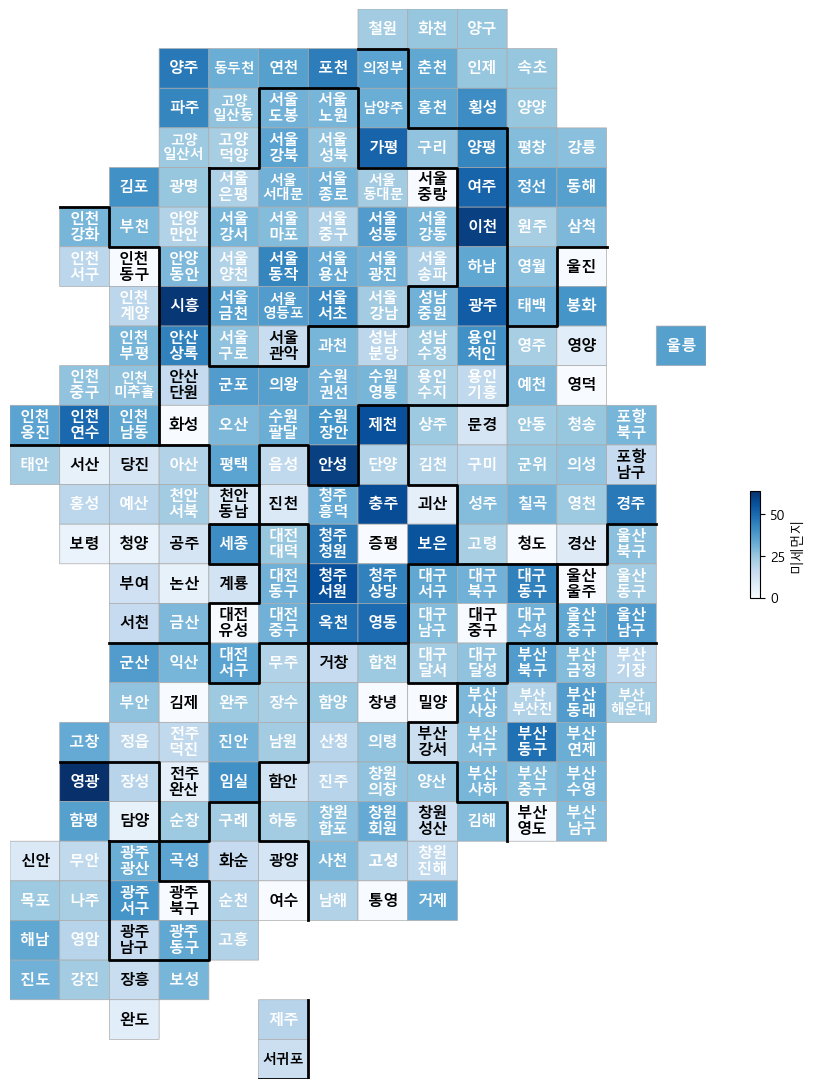

In [15]:
# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')
air = pd.read_csv('data/측정소별대기질.csv', encoding='utf-8')

# '미세먼지' 컬럼을 pop DataFrame에 추가
air['미세먼지(PM10) 농도'] = pd.to_numeric(air['미세먼지(PM10) 농도'], errors='coerce').fillna(0)
pop['미세먼지'] = air['미세먼지(PM10) 농도']

drawKorea('미세먼지', pop, 'Blues')

#### API 키 활용해서 카토그램 만들기

In [3]:
import requests
import pandas as pd
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus

# 측정소별 실시간 측정정보 조회 (매시 15분 내외 업데이트)
base_url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
with open('keys/에어코리아api6.txt') as file:
    service_key = file.read()       # 발급받은 에어코리아 API 키 입력

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'],
                '일산화탄소 농도': latest_data['coValue'],
                '오존 농도': latest_data['o3Value'],
                '이산화질소 농도': latest_data['no2Value'],
                '미세먼지(PM10) 농도': latest_data['pm10Value'],
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value']
            }

            # 결과 리스트에 추가
            results_list.append(result)


    # '미세먼지' 컬럼을 pop DataFrame에 추가
    pop['미세먼지'] = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    
    # '미세먼지' 컬럼을 pop DataFrame에 추가
    pop['미세먼지'] = pd.to_numeric(pop['미세먼지'], errors='coerce').fillna(0)

    drawKorea('미세먼지', pop, 'Blues')

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()

ValueError: Length of values (247) does not match length of index (250)

In [ ]:
import requests
import pandas as pd
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus

# 측정소별 실시간 측정정보 조회 (매시 15분 내외 업데이트)
base_url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
with open('keys/에어코리아api6.txt') as file:
    service_key = file.read()       # 발급받은 에어코리아 API 키 입력

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 1,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 최종 데이터 생성
        result = {
            '날짜': data['dataTime'],
            '이름': data['stationName'],
            '측정망 정보': data['mangName'],
            '아황산가스 농도': data['so2Value'],
            '일산화탄소 농도': data['coValue'],
            '오존 농도': data['o3Value'],
            '이산화질소 농도': data['no2Value'],
            '미세먼지(PM10) 농도': data['pm10Value'],
            '초미세먼지(PM2.5) 농도': data['pm25Value']
        }

        # 결과 리스트에 추가
        results_list.append(result)


    # '미세먼지' 컬럼을 pop DataFrame에 추가
    pop['미세먼지'] = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    
    # 숫자로 변환하고 변환할수없는 값은 NaN으로 대체, NaN값은 0으로 변경
    pop['미세먼지'] = pd.to_numeric(pop['미세먼지'], errors='coerce').fillna(0)

    drawKorea('미세먼지', pop, 'Blues')

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()

In [10]:
pop.tail(100)

,Unnamed: 0,ID,광역시도,시군구,격자 X,격자 Y,y,x,미세먼지(PM10) 농도
150,150,익산,전라북도,익산시,60,91,16,3,18.0
151,151,정읍,전라북도,정읍시,58,83,18,2,18.0
152,152,남원,전라북도,남원시,68,80,18,5,18.0
153,153,김제,전라북도,김제시,59,88,17,3,18.0
154,154,완주,전라북도,완주군,63,89,17,4,18.0
...,...,...,...,...,...,...,...,...,...
245,245,철원,강원특별자치도,철원군,65,139,0,7,18.0
246,246,화천,강원특별자치도,화천군,72,139,0,8,18.0
247,247,양구,강원특별자치도,양구군,77,139,0,9,18.0
248,248,인제,강원특별자치도,인제군,80,138,1,9,18.0
